# Fake.Br Corpus
Link para o artigo: http://conteudo.icmc.usp.br/pessoas/taspardo/PROPOR2018-MonteiroEtAl.pdf  
Citações: [Desenvolvimento de um sistema para a classificação de Fakenews com Textos de Notícias em Língua Portuguesa](https://www.researchgate.net/profile/Roger_Monteiro/publication/334848379_Desenvolvimento_de_um_sistema_para_a_classificacao_de_Fakenews_com_Textos_de_Noticias_em_lingua_Portuguesa/links/5d4321ba4585153e59352335/Desenvolvimento-de-um-sistema-para-a-classificacao-de-Fakenews-com-Textos-de-Noticias-em-lingua-Portuguesa.pdf)

### Texto abaixo extraído do repositório do Fake.br no Github:
https://github.com/roneysco/Fake.br-Corpus  

# Fake.Br Corpus
[![tag](http://nilc.icmc.usp.br/nilc/templates/nilc/images/logotipo.png)](http://nilc.icmc.usp.br/nilc/index.php)

Hello! Thank you for using our corpus!

Here you may find 2 folders, with two versions of the same corpus:

 - ``full_texts`` folder, which contains the full texts, as collected from their websites. Inside this folder, there are 4 more folders:

   - ``fake`` folder: it contains the collected fake news;
   - ``true`` folder: it contains the collected true news;
   - ``fake-meta-information`` folder: it contains the metadata information of each fake news;
   - ``true-meta-information`` folder: it contains the metadata information of each true news;

   The files in the fake and true metadata information folders follow the following model (line by line):

		author
		link
		category
		date of publication
		number of tokens
		number of words without punctuation
		number of types
		number of links inside the news
		number of words in upper case
		number of verbs
		number of subjuntive and imperative verbs
		number of nouns
		number of adjectives
		number of adverbs
		number of modal verbs (mainly auxiliary verbs)
		number of singular first and second personal pronouns
		number of plural first personal pronouns
		number of pronouns
		pausality
		number of characters
		average sentence length
		average word length
		percentage of news with speeling errors
		emotiveness
		diversity

   To find the aligned true and fake news pairs is very simple, as they are equally numbered/named inside their folders.

 - ``size_normalized_texts`` folder, which contains the truncated texts, where, in each fake-true pair, the longer text is truncated (in number of words) to the size of the shorter text. This version of the corpus may be useful for avoiding bias in machine learning experiments.

Finally, if you use our corpus, please include a citation to our project website and the corresponding paper published in PROPOR 2018 conference:

``Monteiro R.A., Santos R.L.S., Pardo T.A.S., de Almeida T.A., Ruiz E.E.S., Vale O.A. (2018) Contributions to the Study of Fake News in Portuguese: New Corpus and Automatic Detection Results. In: Villavicencio A. et al. (eds) Computational Processing of the Portuguese Language. PROPOR 2018. Lecture Notes in Computer Science, vol 11122. Springer, Cham``

Bibtex:

	@InProceedings{fakebr:18,
	author={Monteiro, Rafael A. and Santos, Roney L. S. and Pardo, Thiago A. S. and de Almeida, Tiago A. and Ruiz, Evandro E. S. and Vale, Oto A.},
	title={Contributions to the Study of Fake News in Portuguese: New Corpus and Automatic Detection Results},
	booktitle={Computational Processing of the Portuguese Language},
	year={2018},
	publisher={Springer International Publishing},
	pages={324--334},
	isbn={978-3-319-99722-3},
	}

## Useful methods

In [1]:
def plot_distplot(df, feature):
    sns.distplot(df[feature], hist=False, color='c', label='All');
    sns.distplot(df[df['fake'] == 0][feature], hist=False, color='b', label='True');
    sns.distplot(df[df['fake'] == 1][feature], hist=False, color='r', label='Fake');
    plt.show()

def plot_violinplot(df, feature):
    plt.figure(figsize=(3 * 6.4, 4.8))
    plt.subplot(1, 3, 1)
    sns.violinplot(y=df[feature], color='c');
    plt.xlabel('All')
    plt.ylim(0, df[feature].max())

    plt.subplot(1, 3, 2)
    sns.violinplot(y=df[df['fake'] == 0][feature], color='b');
    plt.xlabel('True')
    plt.ylim(0, df[feature].max())
    
    plt.subplot(1, 3, 3)
    sns.violinplot(y=df[df['fake'] == 1][feature], color='r');
    plt.xlabel('Fake')
    plt.ylim(0, df[feature].max())

    plt.show()

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

%matplotlib inline

## Read data

In [3]:
import glob

keys = [
    'author',
    'link',
    'category',
    'date of publication',
    'number of tokens',
    'number of words without punctuation',
    'number of types',
    'number of links inside the news',
    'number of words in upper case',
    'number of verbs',
    'number of subjuntive and imperative verbs',
    'number of nouns',
    'number of adjectives',
    'number of adverbs',
    'number of modal verbs (mainly auxiliary verbs)',
    'number of singular first and second personal pronouns',
    'number of plural first personal pronouns',
    'number of pronouns',
    'pausality',
    'number of characters',
    'average sentence length',
    'average word length',
    'percentage of news with speeling errors',
    'emotiveness',
    'diversity'
]

texts = []
for path in glob.glob("../data/Fake.br-Corpus//full_texts/fake-meta-information/*.txt"):
    item = {}
    with open(path, encoding='utf8') as f:
        for key, value in zip(keys, f.read().split('\n')):
            item[key] = value if value != 'None' else np.nan
    item['fake'] = 1
    texts.append(item)
print(f'{len(texts)} fakes.')

for path in glob.glob("../data/Fake.br-Corpus/full_texts/true-meta-information/*.txt"):
    item = {}
    with open(path, encoding='utf8') as f:
        for key, value in zip(keys, f.read().split('\n')):
            item[key] = value if value != 'None' else np.nan
    item['fake'] = 0
    texts.append(item)
print(f'{len(texts)} total.')

3600 fakes.
7200 total.


In [4]:
df = pd.DataFrame(texts)
df.shape

(7200, 26)

## Data exploration and visualization

In [5]:
pd.set_option('display.max_columns', 500)
df.head()

,author,link,category,date of publication,number of tokens,number of words without punctuation,number of types,number of links inside the news,number of words in upper case,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of singular first and second personal pronouns,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with speeling errors,emotiveness,diversity,fake
0,NaN,https://www.diariodobrasil.org/ex-petista-diz-...,tv_celebridades,14/12/2015,91,82,64,1,2,7,0,28,3,1,0,0,0,2,1.8,381,16.4,4.64634,0.0,0.114286,0.780488,1
1,NaN,https://www.diariodobrasil.org/teoria-diz-que-...,politica,03/01/2018,606,524,287,0,6,91,2,150,28,29,21,0,0,18,3.15385,2572,20.1538,4.9084,0.0,0.236515,0.54771,1
2,Josias Oliveira,https://afolhabrasil.com.br/politica/veja-aqui...,politica,2017-06-09,136,129,90,0,3,19,5,43,4,5,2,0,0,11,0.5,634,9.21429,4.91473,0.0465116,0.145161,0.697674,1
3,NaN,https://www.diariodobrasil.org/dilma-compara-g...,politica,17/07/2016,148,129,86,0,0,24,0,39,5,10,6,0,0,2,1.72727,649,11.7273,5.03101,0.0,0.238095,0.666667,1
4,NaN,https://www.diariodobrasil.org/saiba-quem-sao-...,politica,18/10/2017,72,61,50,0,2,11,1,14,6,1,1,0,0,4,1.83333,278,10.1667,4.55738,0.0,0.28,0.819672,1


In [6]:
df['category'] = df['category'].astype('category')
df['date of publication'] = pd.to_datetime(df['date of publication'], errors='coerce')

numeric_features = ['average sentence length', 'average word length', 'diversity',
                    'emotiveness', 'number of adjectives', 'number of adverbs',
                    'number of characters', 'number of links inside the news',
                    'number of modal verbs (mainly auxiliary verbs)', 'number of nouns',
                    'number of plural first personal pronouns', 'number of pronouns',
                    'number of singular first and second personal pronouns',
                    'number of subjuntive and imperative verbs', 'number of tokens',
                    'number of types', 'number of verbs', 'number of words in upper case',
                    'number of words without punctuation', 'pausality',
                    'percentage of news with speeling errors']
for num_feat in numeric_features:
    df[num_feat] = pd.to_numeric(df[num_feat], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 26 columns):
author                                                   3625 non-null object
link                                                     7200 non-null object
category                                                 7200 non-null category
date of publication                                      6092 non-null datetime64[ns]
number of tokens                                         7200 non-null int64
number of words without punctuation                      7200 non-null int64
number of types                                          7200 non-null int64
number of links inside the news                          5807 non-null float64
number of words in upper case                            7200 non-null int64
number of verbs                                          7200 non-null int64
number of subjuntive and imperative verbs                7200 non-null int64
number of nouns               

In [8]:
df.describe()

,number of tokens,number of words without punctuation,number of types,number of links inside the news,number of words in upper case,number of verbs,number of subjuntive and imperative verbs,number of nouns,number of adjectives,number of adverbs,number of modal verbs (mainly auxiliary verbs),number of singular first and second personal pronouns,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with speeling errors,emotiveness,diversity,fake
count,7200.000000,7200.000000,7200.000000,5807.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,742.763333,646.172222,306.896250,0.215085,7.680694,100.76750,4.063194,182.920278,33.154444,30.014444,13.869028,1.835556,0.502639,38.758056,2.755722,3138.628333,18.229019,4.845171,0.003065,0.209758,0.577903,0.500000
std,774.155454,674.901525,260.201075,0.604319,9.860613,108.03151,5.492677,186.507322,39.702327,37.742105,15.303212,6.666706,1.697008,51.759915,1.154137,3283.090323,6.090270,0.246260,0.007780,0.070239,0.126475,0.500035
min,11.000000,9.000000,9.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,34.000000,2.666670,3.615940,0.000000,0.000000,0.232210,0.000000
25%,183.000000,157.000000,106.000000,0.000000,2.000000,26.00000,1.000000,46.000000,7.000000,7.000000,3.000000,0.000000,0.000000,8.000000,2.166670,755.000000,14.372850,4.696408,0.000000,0.162500,0.471088,0.000000
50%,416.000000,362.000000,208.000000,0.000000,5.000000,57.00000,2.000000,106.000000,18.000000,15.000000,8.000000,0.000000,0.000000,19.000000,2.684015,1756.500000,18.115250,4.846540,0.000579,0.204082,0.577402,0.500000
75%,1064.250000,928.250000,440.000000,0.000000,10.000000,141.00000,5.000000,265.000000,45.000000,39.000000,19.000000,1.000000,0.000000,49.000000,3.224992,4523.000000,21.823775,4.994038,0.003799,0.251055,0.676276,1.000000
max,8634.000000,7588.000000,2805.000000,11.000000,233.000000,1148.00000,65.000000,2170.000000,532.000000,497.000000,181.000000,210.000000,54.000000,720.000000,51.238100,37381.000000,110.250000,5.935780,0.382353,0.750000,1.000000,1.000000


### fake(label)

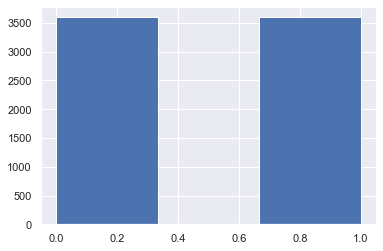

In [9]:
df['fake'].hist(bins=3);

O Conjunto de dados é balanceado e binário(0 corresponde a notícias verdadeiras e 1 corresponde a Fake News).

### author

In [10]:
print(f"Percentage of null values: {df['author'].isna().mean() * 100:.2f}%")
df['author'].describe()

Percentage of null values: 49.65%


count         3625
unique        1436
top        Por G1 
freq           330
Name: author, dtype: object

In [11]:
print(f"Percentage of null values(True): {df[df.fake == 0]['author'].isna().mean() * 100:.2f}%")
print(f"Percentage of null values(Fake News): {df[df.fake == 1]['author'].isna().mean() * 100:.2f}%")

Percentage of null values(True): 1.31%
Percentage of null values(Fake News): 98.00%


Quase metade dos nomes de autores são nulos. Fake News tem o campo nulo para autores na maioria dos casos.

### average sentence length

In [12]:
print(f"Percentage of null values: {df['average sentence length'].isna().mean() * 100:.2f}%")
df['average sentence length'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean       18.229019
std         6.090270
min         2.666670
25%        14.372850
50%        18.115250
75%        21.823775
max       110.250000
Name: average sentence length, dtype: float64

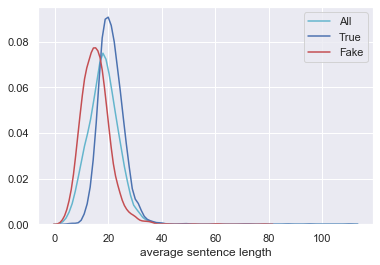

In [13]:
plot_distplot(df, 'average sentence length')

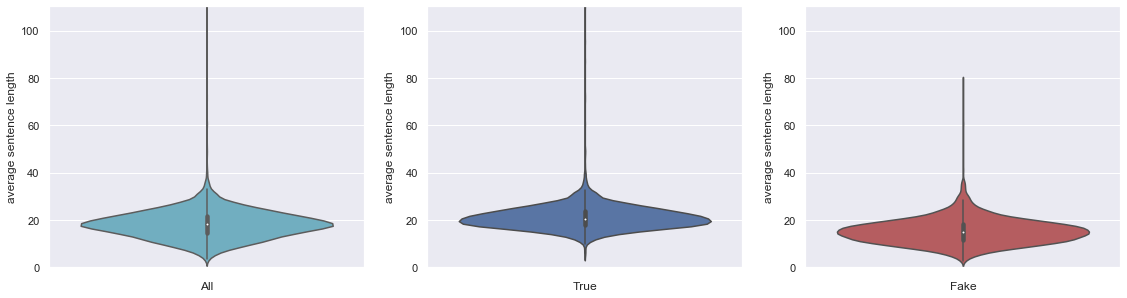

In [14]:
plot_violinplot(df, 'average sentence length')

Fake News tendem a ter o tamanho das sentenças menor.

### average word length

In [15]:
print(f"Percentage of null values: {df['average word length'].isna().mean() * 100:.2f}%")
df['average word length'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        4.845171
std         0.246260
min         3.615940
25%         4.696408
50%         4.846540
75%         4.994038
max         5.935780
Name: average word length, dtype: float64

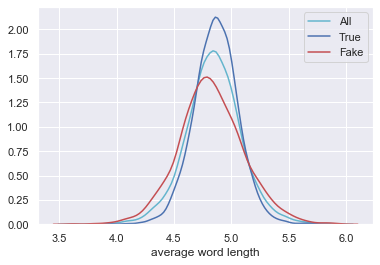

In [16]:
plot_distplot(df, 'average word length')

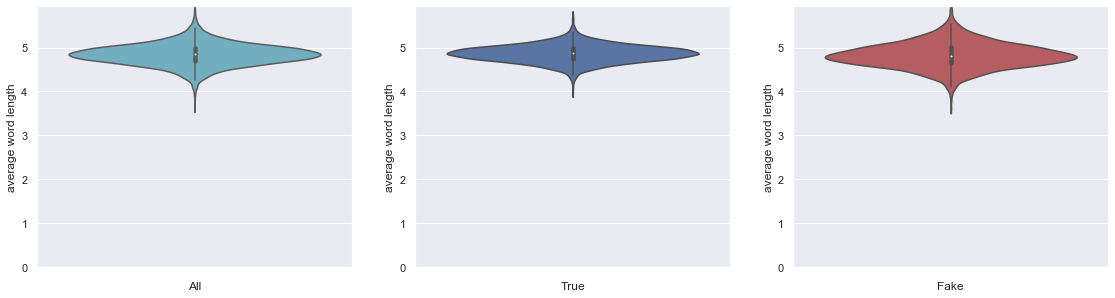

In [17]:
plot_violinplot(df, 'average word length')

Fake News tendem a ter o tamanho médio de palavras ligeiramente menor.

### diversity

In [18]:
print(f"Percentage of null values: {df['diversity'].isna().sum() * 100:.2f}%")
df['diversity'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        0.577903
std         0.126475
min         0.232210
25%         0.471088
50%         0.577402
75%         0.676276
max         1.000000
Name: diversity, dtype: float64

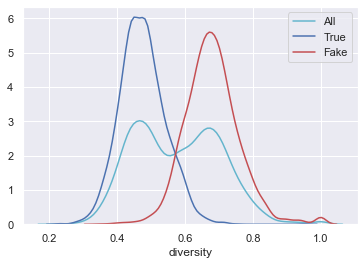

In [19]:
plot_distplot(df, 'diversity')

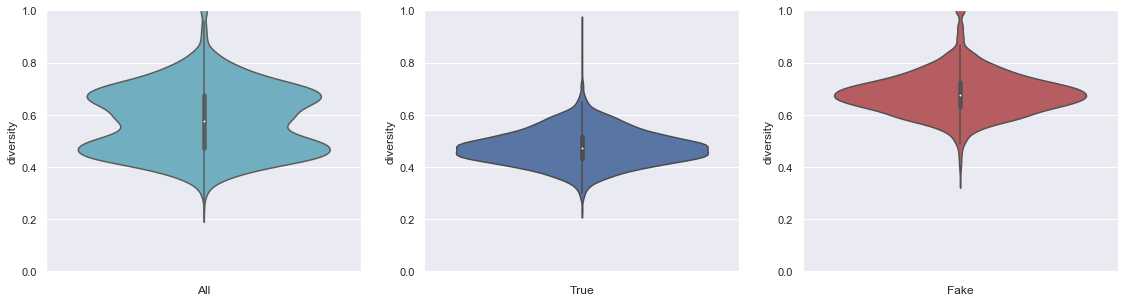

In [20]:
plot_violinplot(df, 'diversity')

A diversidade de palavras em Fake News é maior que em notícias verdadeiras.

### emotiveness

In [21]:
print(f"Percentage of null values: {df['diversity'].isna().mean() * 100:.2f}%")
df['diversity'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        0.577903
std         0.126475
min         0.232210
25%         0.471088
50%         0.577402
75%         0.676276
max         1.000000
Name: diversity, dtype: float64

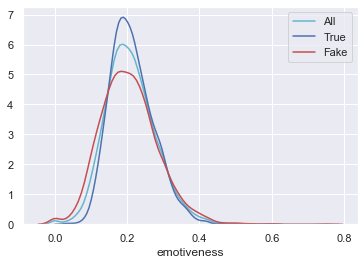

In [22]:
plot_distplot(df, 'emotiveness')

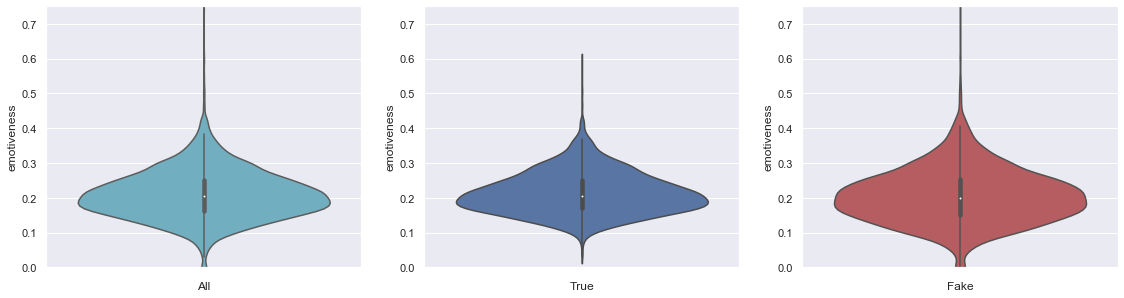

In [23]:
plot_violinplot(df, 'emotiveness')

### category

In [24]:
print(f"Percentage of null values: {df['category'].isna().mean() * 100:.2f}%")
df['category'].describe()

Percentage of null values: 0.00%


count         7200
unique           6
top       politica
freq          4180
Name: category, dtype: object

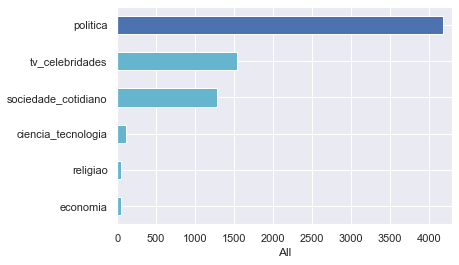

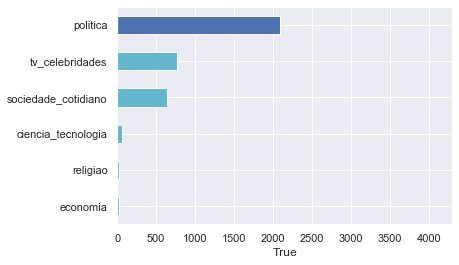

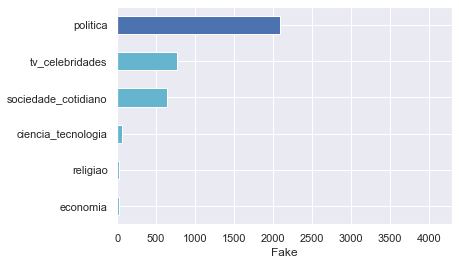

In [25]:
df['category'].value_counts().plot(kind='barh', color=['b'] + 5 *['c']);
plt.gca().invert_yaxis();
plt.xlabel('All');
plt.xlim(0, 4300)
plt.show()

df[df['fake'] == 0]['category'].value_counts().plot(kind='barh', color=['b'] + 5 *['c']);
plt.gca().invert_yaxis();
plt.xlabel('True');
plt.xlim(0, 4300)
plt.show()

df[df['fake'] == 1]['category'].value_counts().plot(kind='barh', color=['b'] + 5 *['c']);
plt.gca().invert_yaxis();
plt.xlabel('Fake');
plt.xlim(0, 4300)
plt.show()

O Conjunto de dados está bem balanceado em relação as categorias de notícias verdadeiras e Fake News, porém apresenta mais notícias na categoria política em ambos os casos.

### date of publication

In [26]:
print(f"Percentage of null values: {df['date of publication'].isna().mean() * 100:.2f}%")
df['date of publication'].describe()

Percentage of null values: 15.39%


count                    6092
unique                   2939
top       2018-04-01 00:00:00
freq                       22
first     2012-09-13 00:00:00
last      2018-12-03 19:56:00
Name: date of publication, dtype: object

In [27]:
print(f"Percentage of null values(True): {df[df.fake == 0]['date of publication'].isna().mean() * 100:.2f}%")
print(f"Percentage of null values(Fake News): {df[df.fake == 1]['date of publication'].isna().mean() * 100:.2f}%")

Percentage of null values(True): 30.75%
Percentage of null values(Fake News): 0.03%


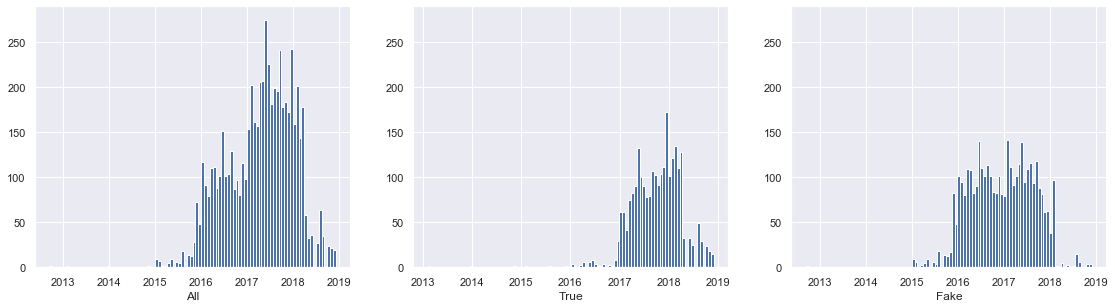

In [28]:
plt.figure(figsize=(3 * 6.4, 4.8));
plt.subplot(1, 3, 1);
df['date of publication'].hist(bins=100);
plt.xlabel('All');
plt.ylim(0, 290);

plt.subplot(1, 3, 2);
df[df['fake'] == 0]['date of publication'].hist(bins=100);
plt.xlabel('True');
plt.ylim(0, 290);

plt.subplot(1, 3, 3)
df[df['fake'] == 1]['date of publication'].hist(bins=100);
plt.xlabel('Fake');
plt.ylim(0, 290);

### link

In [29]:
domain = []
domain_fake = []
domain_true = []
fix_names = {
    'politica.estadao.com.br': 'estadao',
    'internacional.estadao.com.br': 'estadao',
    'cultura.estadao.com.br': 'estadao',
    'www1.folha.uol.com.br': 'estadao',
    'economia.estadao.com.br': 'estadao',
    'brasil.estadao.com.br': 'estadao',
    'esportes.estadao.com.br': 'estadao',
    'alias.estadao.com.br': 'estadao',
    'sao-paulo.estadao.com.br': 'estadao',
    'saude.estadao.com.br': 'estadao',
    'sustentabilidade.estadao.com.br': 'estadao',
    'opiniao.estadao.com.br': 'estadao',
    'www.estadao.com.br': 'estadao',
    'educacao.estadao.com.br': 'estadao',
    'viagem.estadao.com.br': 'estadao',
    'ciencia.estadao.com.br': 'estadao',
    'emais.estadao.com.br': 'estadao',
    'link.estadao.com.br': 'estadao',
    'acervo.estadao.com.br': 'estadao',
    'blogdofred.blogfolha.uol.com.br': 'folha',
    'f5.folha.uol.com.br': 'folha',
    'datafolha.folha.uol.com.br': 'folha'
}
for i in range(df.shape[0]):
    domain.append(fix_names.get(df['link'].iloc[i].split('/')[2], df['link'].iloc[i].split('/')[2]))
    if df['fake'].iloc[i] == 1:
        domain_fake.append(fix_names.get(df['link'].iloc[i].split('/')[2], df['link'].iloc[i].split('/')[2]))
    else:
        domain_true.append(fix_names.get(df['link'].iloc[i].split('/')[2], df['link'].iloc[i].split('/')[2]))

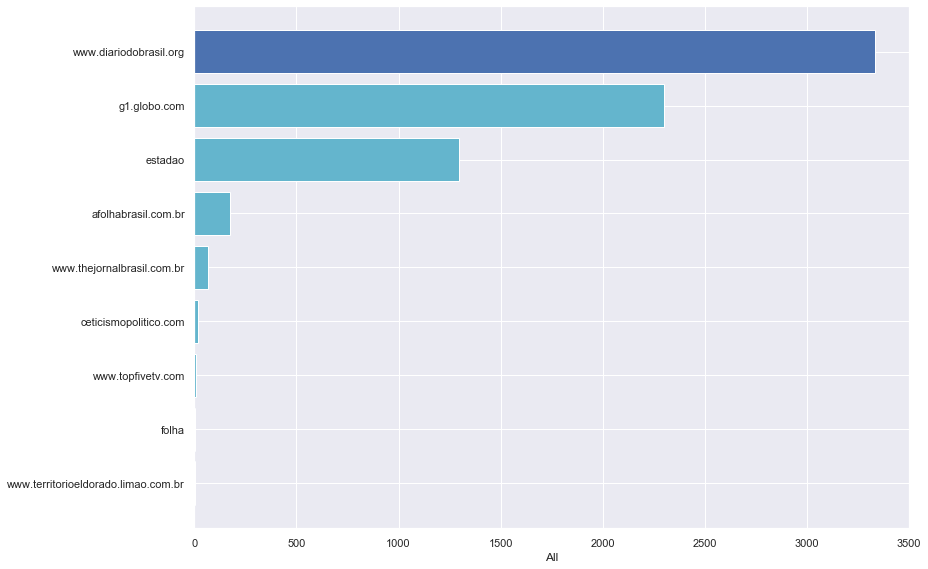

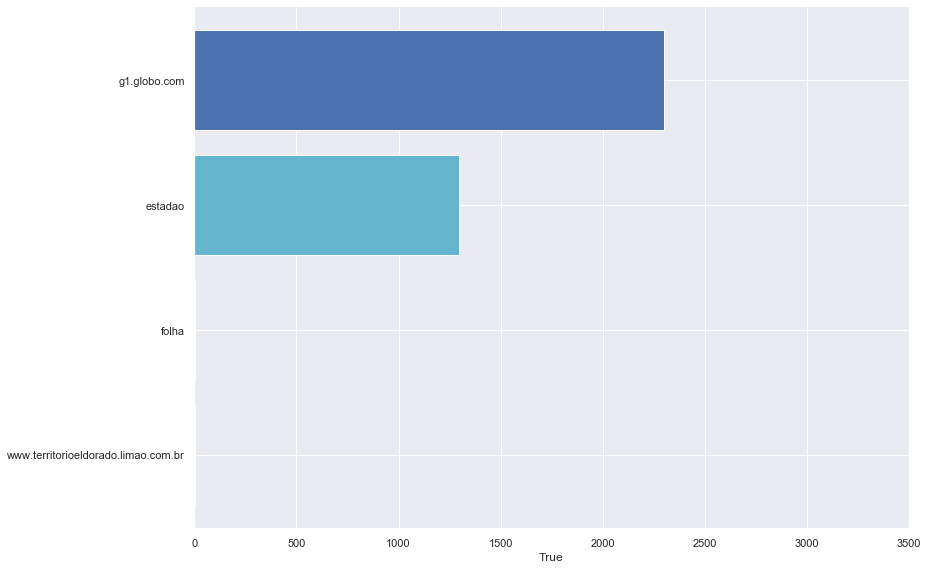

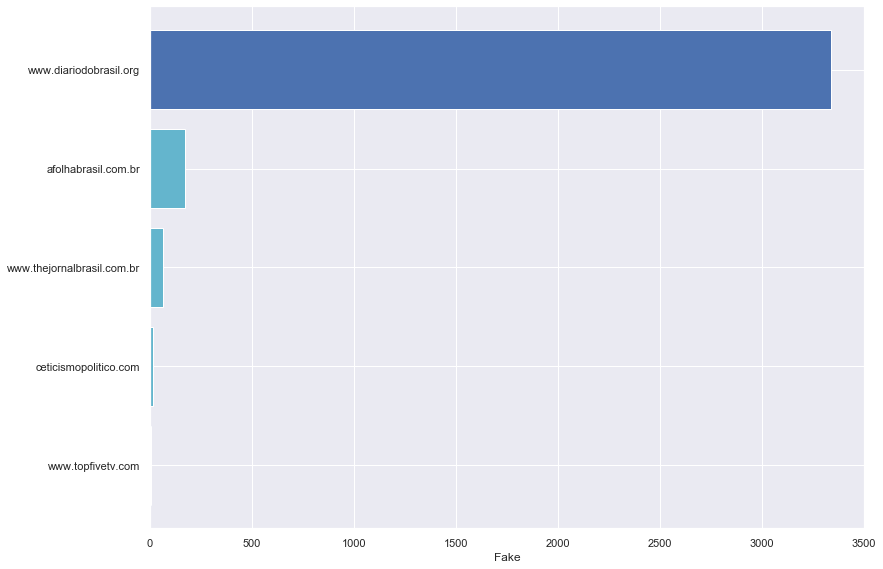

In [30]:
from collections import Counter

domain_freq = Counter(domain).most_common()
y = [x[0] for x in domain_freq]
width = [x[1] for x in domain_freq]
plt.figure(figsize=(2 * 6.4, 2 * 4.8))
plt.barh(y=y, width=width, color=['b'] + 8 *['c']);
plt.gca().invert_yaxis();
plt.xlabel('All');
plt.xlim(0, 3500);
plt.show()

domain_freq = Counter(domain_true).most_common()
y = [x[0] for x in domain_freq]
width = [x[1] for x in domain_freq]
plt.figure(figsize=(2 * 6.4, 2 * 4.8))
plt.barh(y=y, width=width, color=['b'] + 8 *['c']);
plt.gca().invert_yaxis();
plt.xlabel('True');
plt.xlim(0, 3500);
plt.show()

domain_freq = Counter(domain_fake).most_common()
y = [x[0] for x in domain_freq]
width = [x[1] for x in domain_freq]
plt.figure(figsize=(2 * 6.4, 2 * 4.8))
plt.barh(y=y, width=width, color=['b'] + 8 *['c']);
plt.gca().invert_yaxis();
plt.xlabel('Fake');
plt.xlim(0, 3500);
plt.show()

As fontes das notícias verdadeiras são G1, Estadão, folha e territorioeldorado. As fontes das Fake News são diariodobrasil, afolhabrasil, thejornalbrasil, ceticismopolitico e topfivetv.

### number of adjectives

In [31]:
print(f"Percentage of null values: {df['number of adjectives'].isna().mean()}%")
df['number of adjectives'].describe()

Percentage of null values: 0.0%


count    7200.000000
mean       33.154444
std        39.702327
min         0.000000
25%         7.000000
50%        18.000000
75%        45.000000
max       532.000000
Name: number of adjectives, dtype: float64

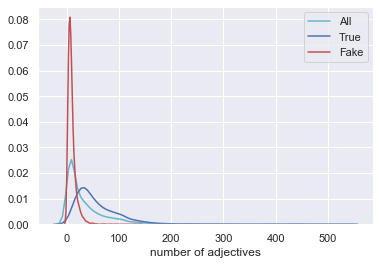

In [32]:
plot_distplot(df, 'number of adjectives')

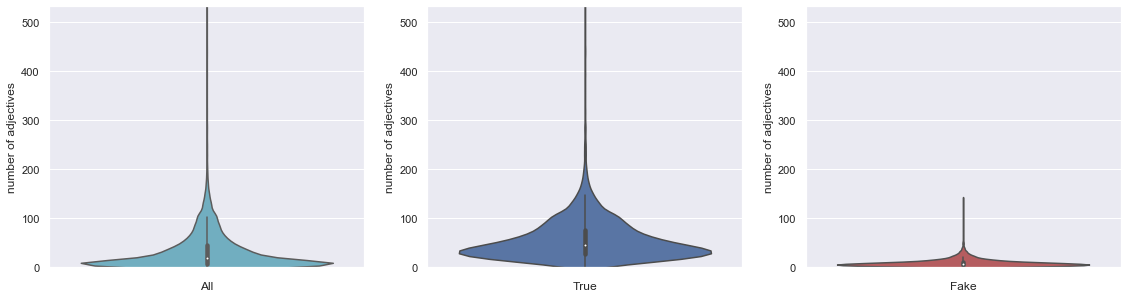

In [33]:
plot_violinplot(df, 'number of adjectives')

Fake News tendem a ter o número de adjetivos menor.

### number of adverbs

In [34]:
print(f"Percentage of null values: {df['number of adverbs'].isna().mean() * 100:.2f}%")
df['number of adverbs'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean       30.014444
std        37.742105
min         0.000000
25%         7.000000
50%        15.000000
75%        39.000000
max       497.000000
Name: number of adverbs, dtype: float64

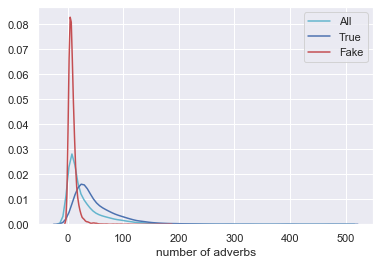

In [35]:
plot_distplot(df, 'number of adverbs')

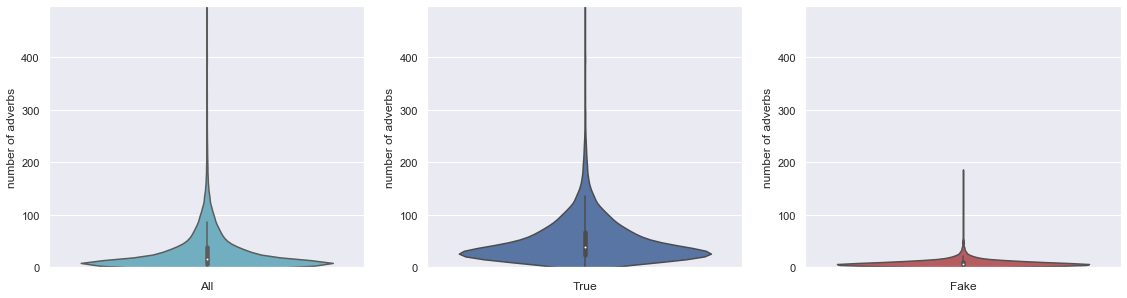

In [36]:
plot_violinplot(df, 'number of adverbs')

Fake News tendem a ter o número de advérbios menor.

### number of characters

In [37]:
print(f"Percentage of null values: {df['number of characters'].isna().mean() * 100:.2f}%")
df['number of characters'].describe()

Percentage of null values: 0.00%


count     7200.000000
mean      3138.628333
std       3283.090323
min         34.000000
25%        755.000000
50%       1756.500000
75%       4523.000000
max      37381.000000
Name: number of characters, dtype: float64

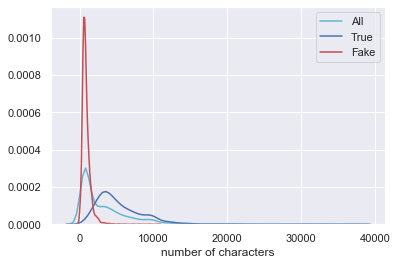

In [38]:
plot_distplot(df, 'number of characters')

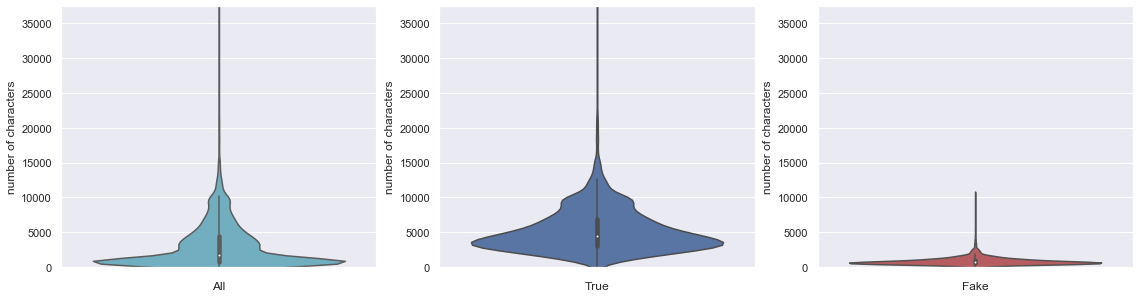

In [39]:
plot_violinplot(df, 'number of characters')

Fake News tendem a ter o número de caracteres menor.

### number of links inside the news

In [40]:
print(f"Percentage of null values(All): {df['number of links inside the news'].isna().mean() * 100:.2f}%")
df['number of links inside the news'].describe()

Percentage of null values(All): 19.35%


count    5807.000000
mean        0.215085
std         0.604319
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: number of links inside the news, dtype: float64

In [41]:
print(f"Percentage of null values(True): {df[df.fake == 0]['number of links inside the news'].isna().mean() * 100:.2f}%")
print(f"Percentage of null values(Fake News): {df[df.fake == 1]['number of links inside the news'].isna().mean() * 100:.2f}%")

Percentage of null values(True): 38.69%
Percentage of null values(Fake News): 0.00%


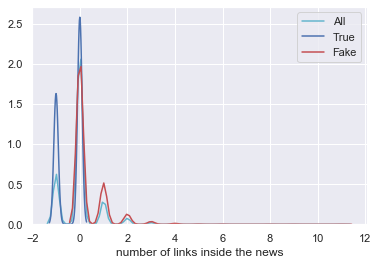

In [42]:
plot_distplot(df[['number of links inside the news', 'fake']].fillna(-1), 'number of links inside the news')

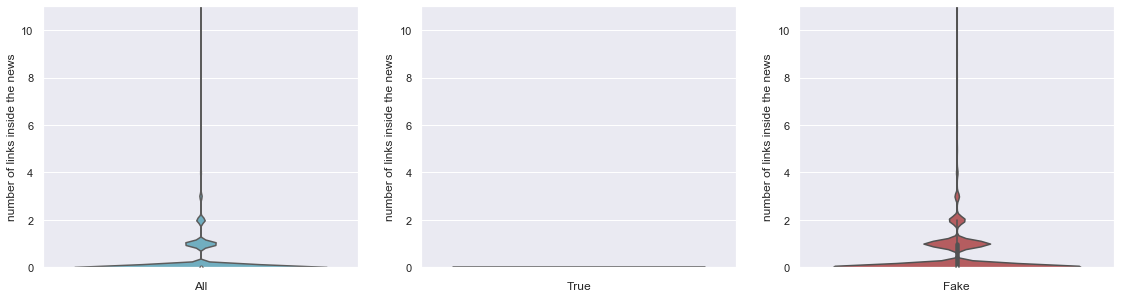

In [43]:
plot_violinplot(df, 'number of links inside the news')

As notícias verdadeiras contém muitos valores nulos nesse campo e o número de links dentro da notícia está indicado como zero.

### number of modal verbs (mainly auxiliary verbs)

In [44]:
print(f"Percentage of null values: {df['number of modal verbs (mainly auxiliary verbs)'].isna().mean() * 100:.2f}%")
df['number of modal verbs (mainly auxiliary verbs)'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean       13.869028
std        15.303212
min         0.000000
25%         3.000000
50%         8.000000
75%        19.000000
max       181.000000
Name: number of modal verbs (mainly auxiliary verbs), dtype: float64

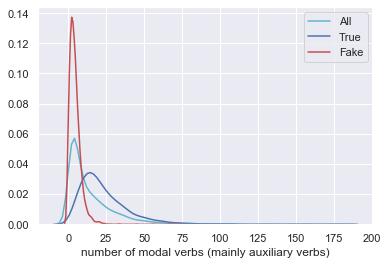

In [45]:
plot_distplot(df, 'number of modal verbs (mainly auxiliary verbs)')

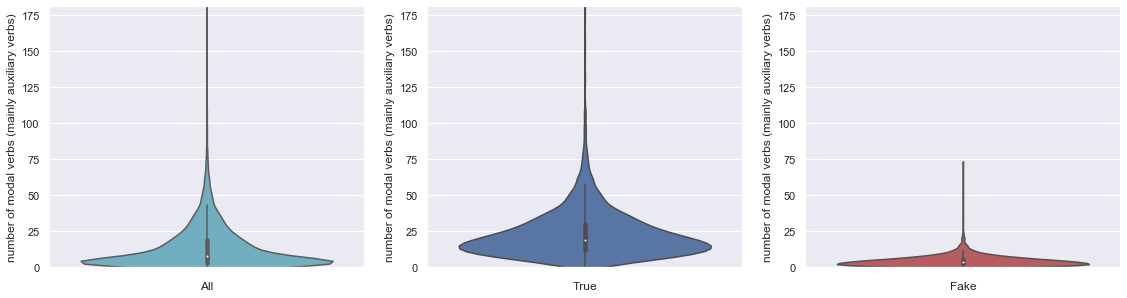

In [46]:
plot_violinplot(df, 'number of modal verbs (mainly auxiliary verbs)')

Fake News tendem a ter número de verbos modais menor.

### number of nouns

In [47]:
print(f"Percentage of null values: {df['number of nouns'].isna().mean() * 100:.2f}%")
df['number of nouns'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean      182.920278
std       186.507322
min         3.000000
25%        46.000000
50%       106.000000
75%       265.000000
max      2170.000000
Name: number of nouns, dtype: float64

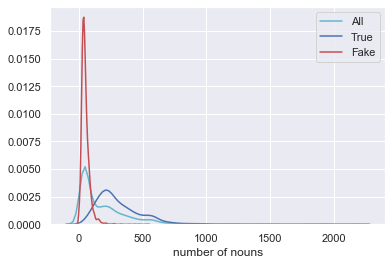

In [48]:
plot_distplot(df, 'number of nouns')

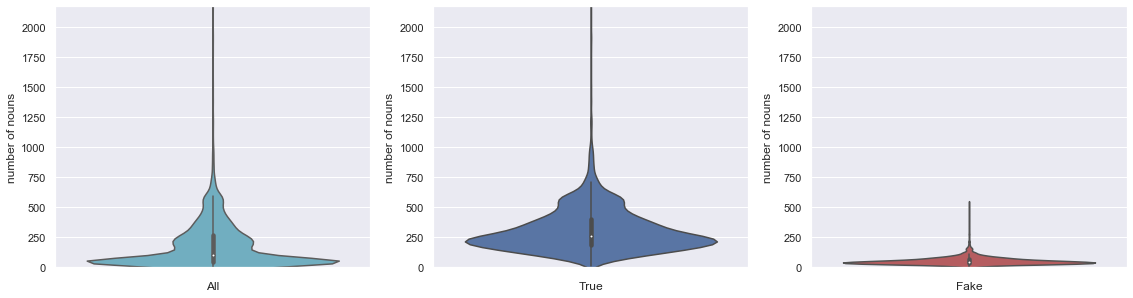

In [49]:
plot_violinplot(df, 'number of nouns')

Fake News tendem a ter um número de substantivos menor.

### number of plural first personal pronouns

In [50]:
print(f"Percentage of null values: {df['number of plural first personal pronouns'].isna().mean() * 100:.2f}%")
df['number of plural first personal pronouns'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        0.502639
std         1.697008
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        54.000000
Name: number of plural first personal pronouns, dtype: float64

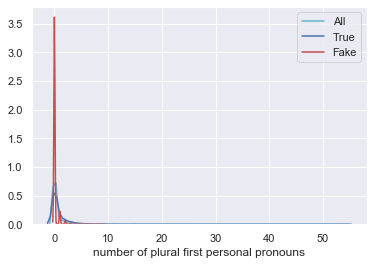

In [51]:
plot_distplot(df, 'number of plural first personal pronouns')

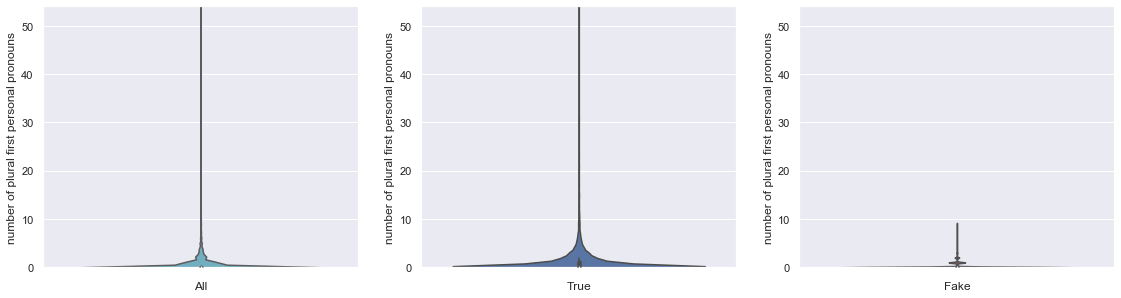

In [52]:
plot_violinplot(df, 'number of plural first personal pronouns')

### number of pronouns

In [53]:
print(f"Percentage of null values: {df['number of pronouns'].isna().mean() * 100:.2f}%")
df['number of pronouns'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean       38.758056
std        51.759915
min         0.000000
25%         8.000000
50%        19.000000
75%        49.000000
max       720.000000
Name: number of pronouns, dtype: float64

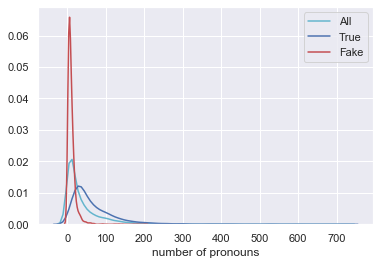

In [54]:
plot_distplot(df, 'number of pronouns')

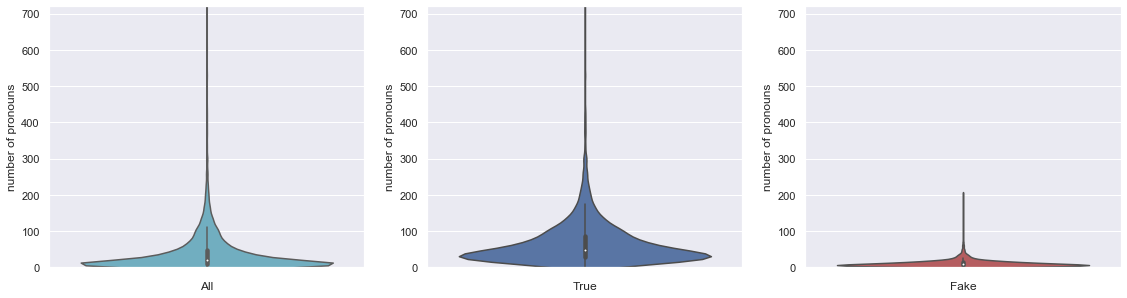

In [55]:
plot_violinplot(df, 'number of pronouns')

Fake News tendem a ter um número de pronomes menor.

### number of singular first and second personal pronouns

In [56]:
print(f"Percentage of null values: {df['number of singular first and second personal pronouns'].isna().mean() * 100:.2f}%")
df['number of singular first and second personal pronouns'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        1.835556
std         6.666706
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       210.000000
Name: number of singular first and second personal pronouns, dtype: float64

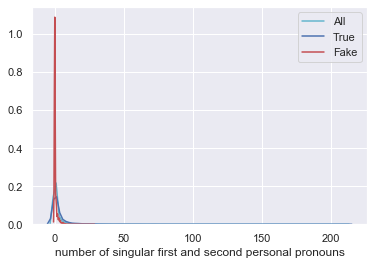

In [57]:
plot_distplot(df, 'number of singular first and second personal pronouns')

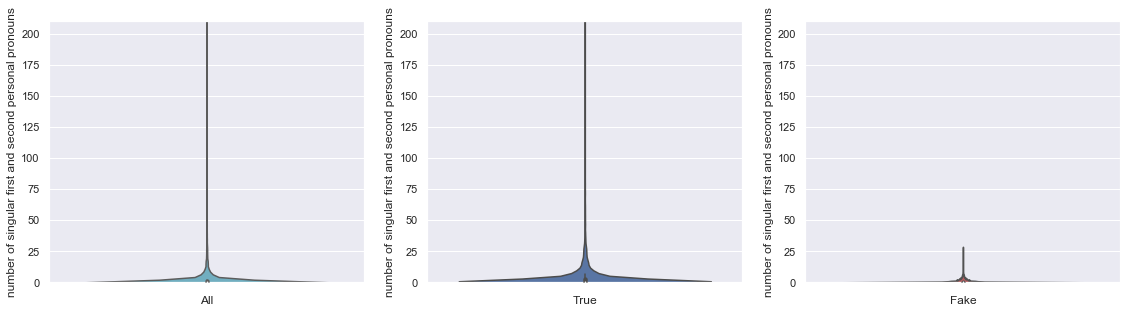

In [58]:
plot_violinplot(df, 'number of singular first and second personal pronouns')

### number of subjuntive and imperative verbs

In [59]:
print(f"Percentage of null values: {df['number of subjuntive and imperative verbs'].isna().mean() * 100:.2f}%")
df['number of subjuntive and imperative verbs'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        4.063194
std         5.492677
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        65.000000
Name: number of subjuntive and imperative verbs, dtype: float64

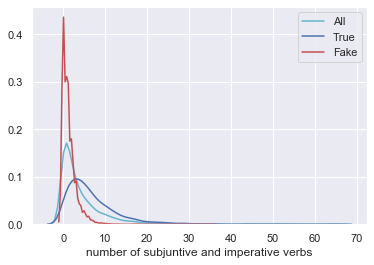

In [60]:
plot_distplot(df, 'number of subjuntive and imperative verbs')

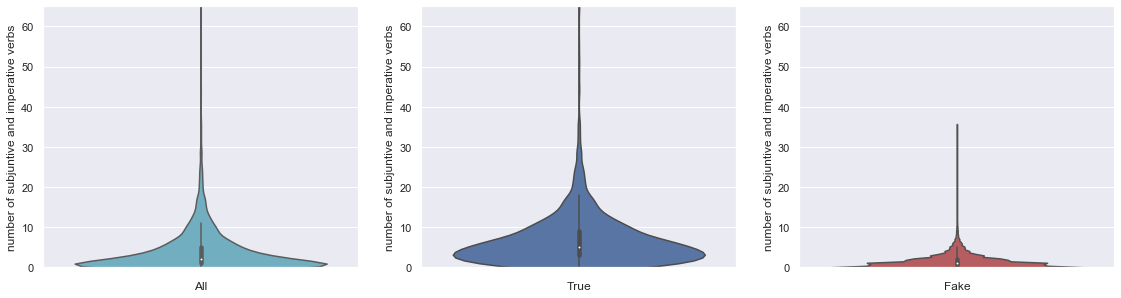

In [61]:
plot_violinplot(df, 'number of subjuntive and imperative verbs')

Fake News tendem a ter um número de verbos subjuntivos e imperativos menor.

### number of tokens

In [62]:
print(f"Percentage of null values: {df['number of tokens'].isna().mean() * 100:.2f}%")
df['number of tokens'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean      742.763333
std       774.155454
min        11.000000
25%       183.000000
50%       416.000000
75%      1064.250000
max      8634.000000
Name: number of tokens, dtype: float64

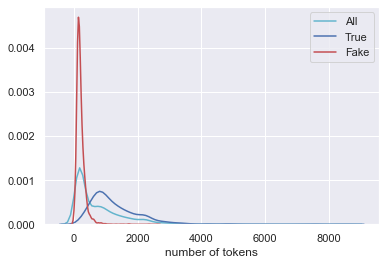

In [63]:
plot_distplot(df, 'number of tokens')

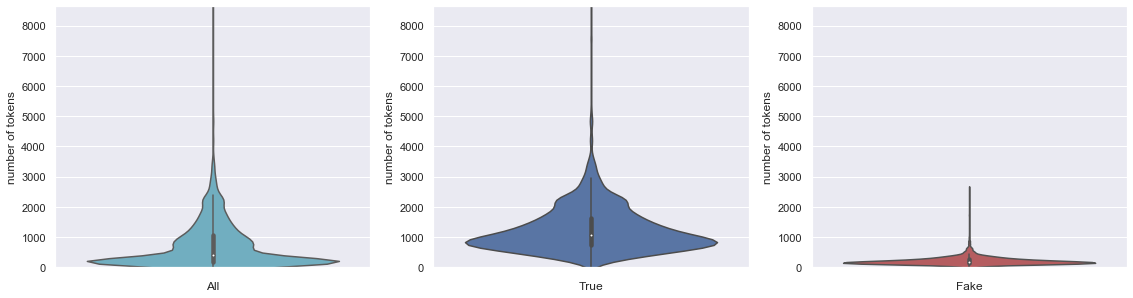

In [64]:
plot_violinplot(df, 'number of tokens')

Fake News tendem a ter um número de tokens menor.

### number of types

In [65]:
print(f"Percentage of null values: {df['number of types'].isna().mean() * 100:.2f}%")
df['number of types'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean      306.896250
std       260.201075
min         9.000000
25%       106.000000
50%       208.000000
75%       440.000000
max      2805.000000
Name: number of types, dtype: float64

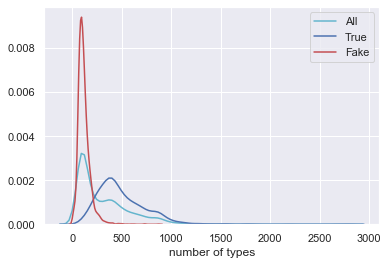

In [66]:
plot_distplot(df, 'number of types')

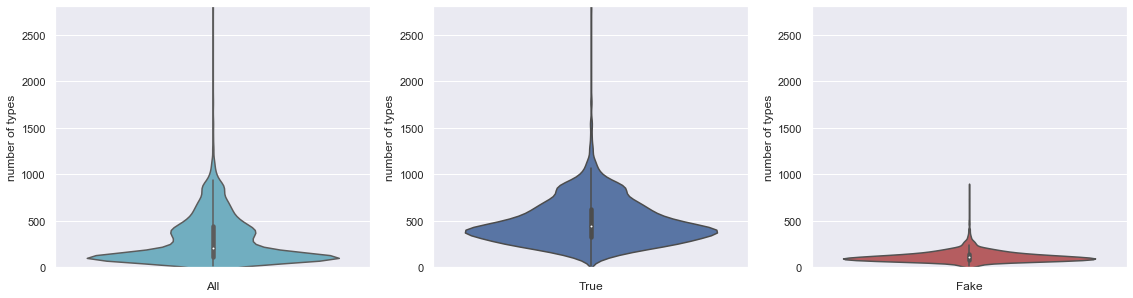

In [67]:
plot_violinplot(df, 'number of types')

Fake News tendem a ter um número de tipos menor.

### number of verbs

In [68]:
print(f"Percentage of null values: {df['number of verbs'].isna().mean() * 100:.2f}%")
df['number of verbs'].describe()

Percentage of null values: 0.00%


count    7200.00000
mean      100.76750
std       108.03151
min         1.00000
25%        26.00000
50%        57.00000
75%       141.00000
max      1148.00000
Name: number of verbs, dtype: float64

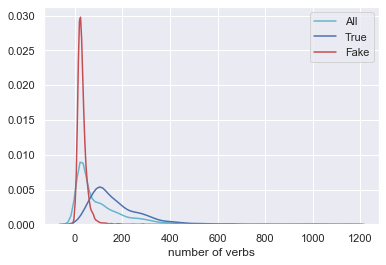

In [69]:
plot_distplot(df, 'number of verbs')

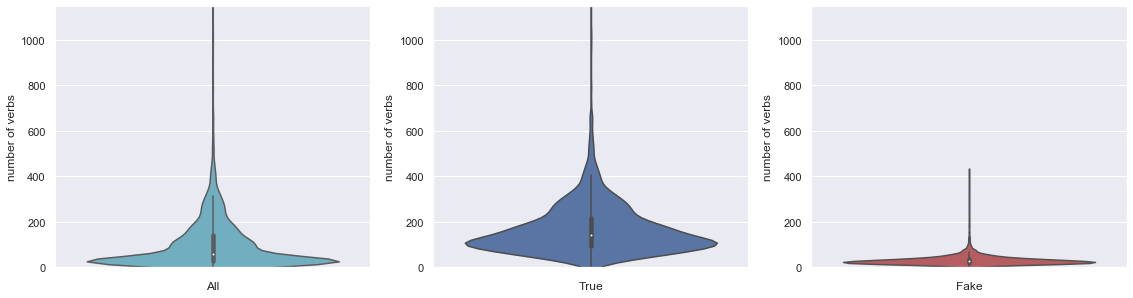

In [70]:
plot_violinplot(df, 'number of verbs')

Fake News tendem a ter um número de verbos menor.

### number of words in upper case

In [71]:
print(f"Percentage of null values: {df['number of words in upper case'].isna().mean() * 100:.2f}%")
df['number of words in upper case'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        7.680694
std         9.860613
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       233.000000
Name: number of words in upper case, dtype: float64

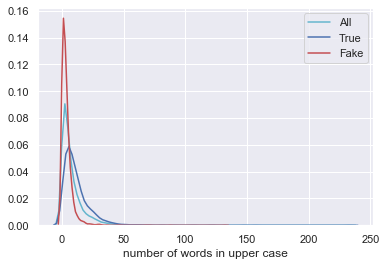

In [72]:
plot_distplot(df, 'number of words in upper case')

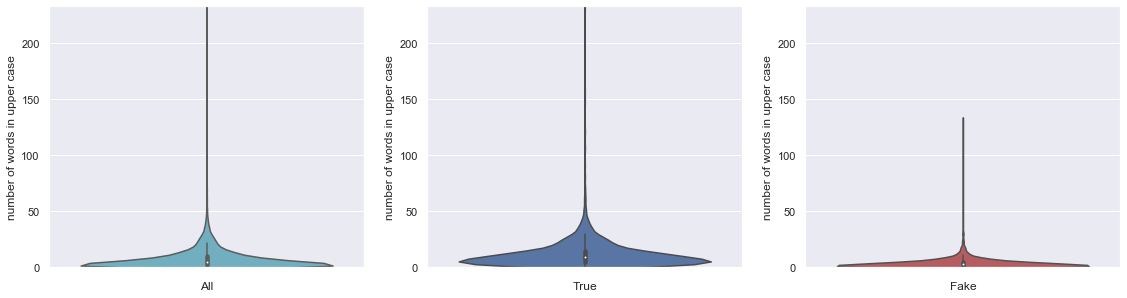

In [73]:
plot_violinplot(df, 'number of words in upper case')

### number of words without punctuation

In [74]:
print(f"Percentage of null values: {df['number of words without punctuation'].isna().mean() * 100:.2f}%")
df['number of modal verbs (mainly auxiliary verbs)'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean       13.869028
std        15.303212
min         0.000000
25%         3.000000
50%         8.000000
75%        19.000000
max       181.000000
Name: number of modal verbs (mainly auxiliary verbs), dtype: float64

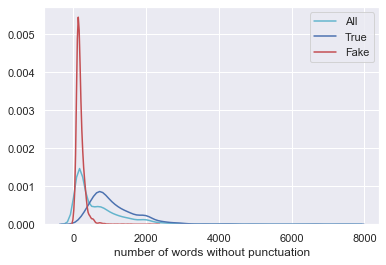

In [75]:
plot_distplot(df, 'number of words without punctuation')

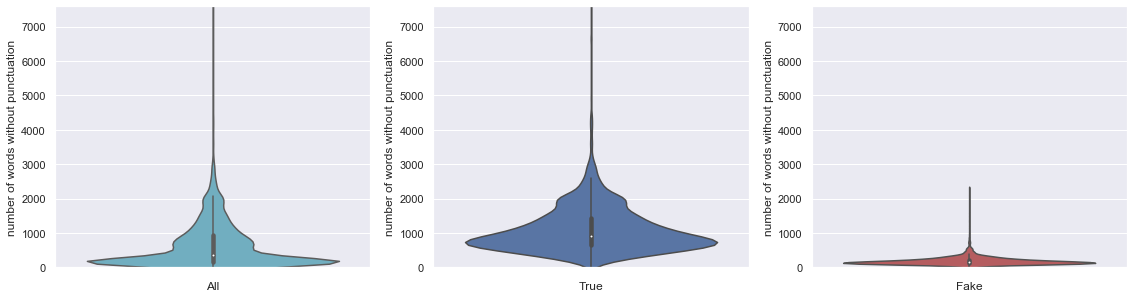

In [76]:
plot_violinplot(df, 'number of words without punctuation')

Fake News tendem a ter um número de palavras sem pontuação menor.

Obs.: A feature se refere ao número de palavras e não a porcentagem de palavras no texto.

### pausality

In [77]:
print(f"Percentage of null values: {df['pausality'].isna().mean() * 100:.2f}%")
df['pausality'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        2.755722
std         1.154137
min         0.250000
25%         2.166670
50%         2.684015
75%         3.224992
max        51.238100
Name: pausality, dtype: float64

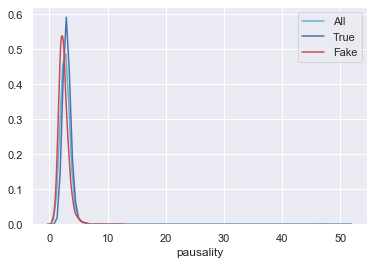

In [78]:
plot_distplot(df, 'pausality')

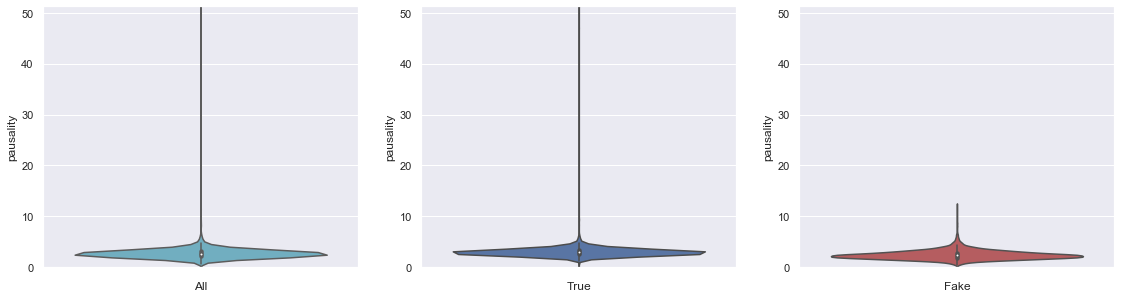

In [79]:
plot_violinplot(df, 'pausality')

### percentage of news with speeling errors

In [80]:
print(f"Percentage of null values: {df['percentage of news with speeling errors'].isna().mean() * 100:.2f}%")
df['percentage of news with speeling errors'].describe()

Percentage of null values: 0.00%


count    7200.000000
mean        0.003065
std         0.007780
min         0.000000
25%         0.000000
50%         0.000579
75%         0.003799
max         0.382353
Name: percentage of news with speeling errors, dtype: float64

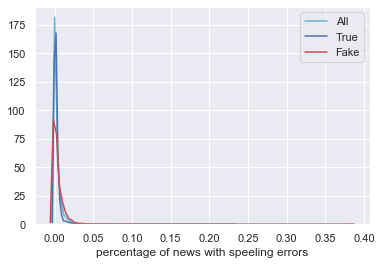

In [81]:
plot_distplot(df, 'percentage of news with speeling errors')

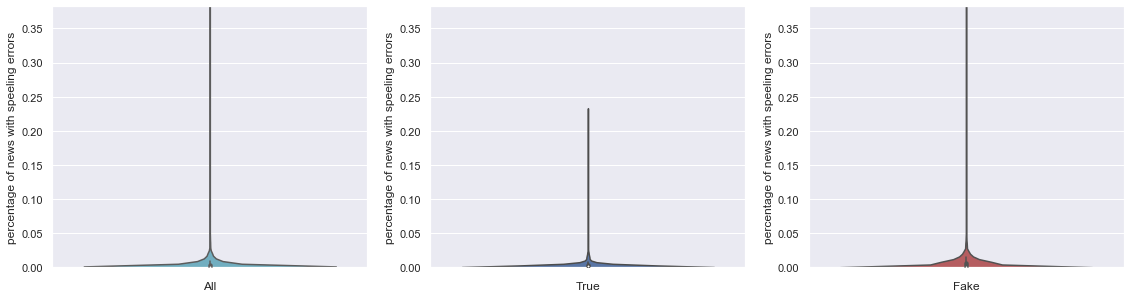

In [82]:
plot_violinplot(df, 'percentage of news with speeling errors')

## Correlations

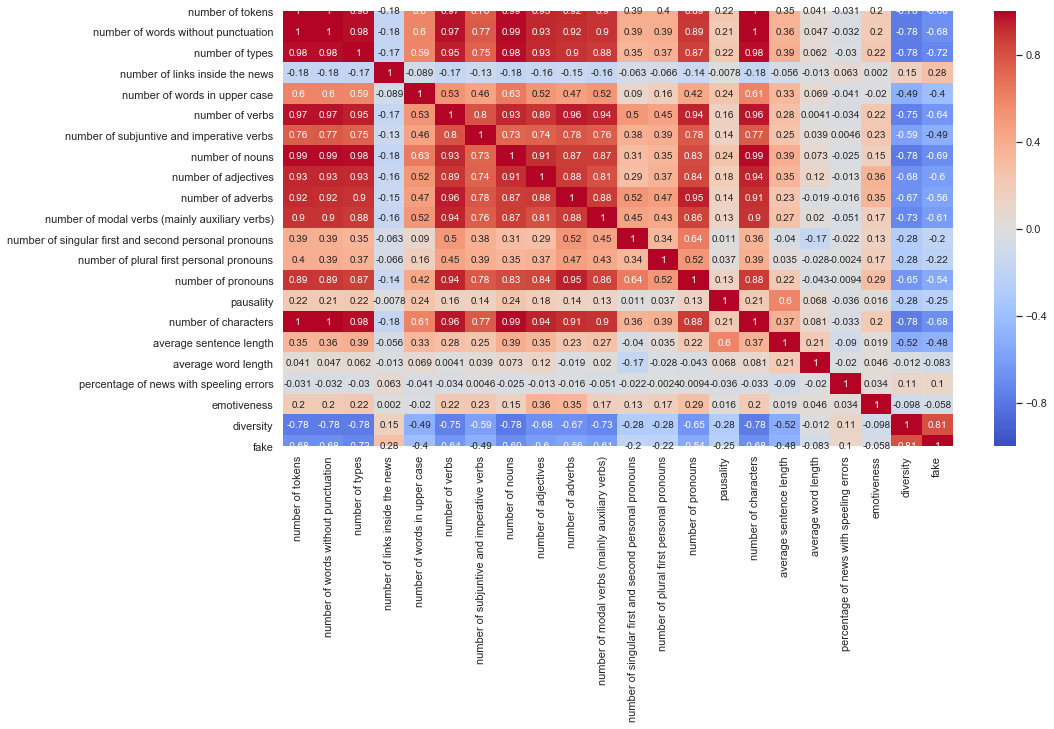

In [83]:
plt.figure(figsize=(15, 8));
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

## Initial models

<p>Para construir os modelos iniciais iremos usar apenas as features numéricas(excluindo author, link, category e date of publication) e preencheremos os valores nulos com o valor simbólico -1. Os algoritmos iniciais usados serão GaussianNB, LogisticRegression, SVC e RandomForest.</p>
<p>Para validar os modelos usaremos 10-fold Cross Validation levando em consideração as métricas: acurácia, precisão, recall e f1-score, focando principalmente no f1-score.</p>

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate

x = df.drop(['fake', 'author', 'link', 'category', 'date of publication'], axis=1).fillna(-1)
y = df.fake

In [85]:
score = cross_validate(
    GaussianNB(), x, y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'),
    n_jobs=-1, return_train_score=True
)
print('Test scores - GaussianNB')
print(f'accuracy:  {np.mean(score["test_accuracy"])}')
print(f'precision: {np.mean(score["test_precision"])}')
print(f'recall:    {np.mean(score["test_recall"])}')
print(f'f1-score:  {np.mean(score["test_f1"])}')

Test scores - GaussianNB
accuracy:  0.9218055555555555
precision: 0.8860772917482966
recall:    0.9683333333333334
f1-score:  0.9252984204402533


In [86]:
score = cross_validate(
    LogisticRegression(), x, y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'),
    n_jobs=-1, return_train_score=True
)
print('Test scores - LogisticRegression')
print(f'accuracy:  {np.mean(score["test_accuracy"])}')
print(f'precision: {np.mean(score["test_precision"])}')
print(f'recall:    {np.mean(score["test_recall"])}')
print(f'f1-score:  {np.mean(score["test_f1"])}')

Test scores - LogisticRegression
accuracy:  0.9730555555555556
precision: 0.9649968728234402
recall:    0.9819444444444443
f1-score:  0.9733383070836339


In [87]:
score = cross_validate(
    SVC(), x, y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'),
    n_jobs=-1, return_train_score=True
)
print('Test scores - SVC')
print(f'accuracy:  {np.mean(score["test_accuracy"])}')
print(f'precision: {np.mean(score["test_precision"])}')
print(f'recall:    {np.mean(score["test_recall"])}')
print(f'f1-score:  {np.mean(score["test_f1"])}')

Test scores - SVC
accuracy:  0.6154166666666667
precision: 0.9952009431553549
recall:    0.23194444444444445
f1-score:  0.3759150801046517


In [88]:
score = cross_validate(
    RandomForestClassifier(), x, y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1'),
    n_jobs=-1, return_train_score=True
)
print('Test scores - RandomForest')
print(f'accuracy:  {np.mean(score["test_accuracy"])}')
print(f'precision: {np.mean(score["test_precision"])}')
print(f'recall:    {np.mean(score["test_recall"])}')
print(f'f1-score:  {np.mean(score["test_f1"])}')

Test scores - RandomForest
accuracy:  0.976388888888889
precision: 0.9806949045387341
recall:    0.9719444444444443
f1-score:  0.9762658493761835


RandomForest apresenta o melhor resultado de f1-score, seguido de LogisticRegression que tem um resultado aproximado.